In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/Amazon Products/amazon_product.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   64 non-null     int64  
 1   asin                         64 non-null     object 
 2   product_title                64 non-null     object 
 3   product_price                64 non-null     object 
 4   product_original_price       27 non-null     object 
 5   currency                     64 non-null     object 
 6   product_star_rating          54 non-null     float64
 7   product_num_ratings          64 non-null     int64  
 8   product_url                  64 non-null     object 
 9   product_photo                64 non-null     object 
 10  product_num_offers           64 non-null     int64  
 11  product_minimum_offer_price  64 non-null     object 
 12  is_best_seller               64 non-null     bool   
 13  is_amazon_choice      

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
asin,0
product_title,0
product_price,0
product_original_price,37
currency,0
product_star_rating,10
product_num_ratings,0
product_url,0
product_photo,0


In [ ]:
#fill null in numerical columns with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

#fill null in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
asin,0
product_title,0
product_price,0
product_original_price,0
currency,0
product_star_rating,0
product_num_ratings,0
product_url,0
product_photo,0


In [ ]:
# Replace wrong values in the 'sales_volume' column with the mode
def replace_with_mode(data, column_name):

  mode_value = data[column_name].mode().iloc[0]
  mask = data[column_name].str.contains('bought in past month')
  data.loc[~mask, column_name] = mode_value

  return data

data = replace_with_mode(data, 'sales_volume')

    Unnamed: 0        asin                                      product_title  \
0            0  B0BQ118F2T  Moto G Play 2023 3-Day Battery Unlocked Made f...   
1            1  B0CTD47P22  SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...   
2            2  B0CHH6X6H2  Total by Verizon | Samsung Galaxy A03s | Locke...   
3            3  B0BZ9XNBRB  Google Pixel 7a - Unlocked Android Cell Phone ...   
4            4  B0CN1QSH8Q  SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...   
..         ...         ...                                                ...   
59          59  B0D6LWXK1R  Greatish Hits: I Followed My Dreams and My Dre...   
60          60  B0CLKQF5HR                                          Swan Song   
61          61  B0BZFHK12K                            Bluey: Let&#x27;s Play!   
62          62  B09Z7J4L6X  Xbox Wireless Controller – Sky Cipher Special ...   
63          63  B0CT2R7199  HP DeskJet 2855e Wireless All-in-One Color Ink...   

   product_price product_or

In [ ]:
# Convert sales volume to numeric values (interpret 'K' means)
def convert_sales_volume(data, column_name):
  def convert_value(value):
    match = re.search(r'(\d+)(\w+)', value)
    if match:
      number, unit = match.groups()
      number = int(number)
      if unit == 'K':
        return number * 1000
      elif unit == 'M':
        return number * 1000000
      else:
        return number
    else:
      return None

  data[column_name] = data[column_name].apply(convert_value)
  return data

data = convert_sales_volume(data, 'sales_volume')

    Unnamed: 0        asin                                      product_title  \
0            0  B0BQ118F2T  Moto G Play 2023 3-Day Battery Unlocked Made f...   
1            1  B0CTD47P22  SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...   
2            2  B0CHH6X6H2  Total by Verizon | Samsung Galaxy A03s | Locke...   
3            3  B0BZ9XNBRB  Google Pixel 7a - Unlocked Android Cell Phone ...   
4            4  B0CN1QSH8Q  SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...   
..         ...         ...                                                ...   
59          59  B0D6LWXK1R  Greatish Hits: I Followed My Dreams and My Dre...   
60          60  B0CLKQF5HR                                          Swan Song   
61          61  B0BZFHK12K                            Bluey: Let&#x27;s Play!   
62          62  B09Z7J4L6X  Xbox Wireless Controller – Sky Cipher Special ...   
63          63  B0CT2R7199  HP DeskJet 2855e Wireless All-in-One Color Ink...   

   product_price product_or

In [ ]:
data.head()

,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
0,0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,$169.99,USD,4.0,2929,https://www.amazon.com/dp/B0BQ118F2T,https://m.media-amazon.com/images/I/61K1Fz5Lxv...,...,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,Only 7 left in stock - order soon.,$0.25,15.2
1,1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,$158.00,USD,4.2,135,https://www.amazon.com/dp/B0CTD47P22,https://m.media-amazon.com/images/I/51QhB2CfqS...,...,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,Only 7 left in stock - order soon.,$0.25,15.2
2,2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,$105.00,USD,3.9,205,https://www.amazon.com/dp/B0CHH6X6H2,https://m.media-amazon.com/images/I/812woqv69C...,...,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,Only 7 left in stock - order soon.,$0.25,15.2
3,3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,$499.00,USD,4.3,2248,https://www.amazon.com/dp/B0BZ9XNBRB,https://m.media-amazon.com/images/I/61r7cCpQPl...,...,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,Only 7 left in stock - order soon.,$0.25,15.2
4,4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,$105.00,USD,4.1,423,https://www.amazon.com/dp/B0CN1QSH8Q,https://m.media-amazon.com/images/I/61s0ZzwzSC...,...,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,Only 7 left in stock - order soon.,$0.25,15.2


In [ ]:
# download the dataset
from google.colab import files
data.to_csv('amazon_product_clean.csv')
files.download('amazon_product_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculate summary statistics for numeric columns
summary_stats = data.describe()
print(summary_stats)

       Unnamed: 0  product_star_rating  product_num_ratings  \
count   64.000000            64.000000         6.400000e+01   
mean    31.500000             4.244444         5.210164e+04   
std     18.618987             0.511973         1.576855e+05   
min      0.000000             1.800000         0.000000e+00   
25%     15.750000             4.200000         4.775000e+01   
50%     31.500000             4.272222         9.675000e+02   
75%     47.250000             4.600000         1.384625e+04   
max     63.000000             4.800000         1.015448e+06   

       product_num_offers  unit_count  
count           64.000000   64.000000  
mean             4.859375   15.200000  
std              8.145243    6.397916  
min              1.000000    0.000000  
25%              1.000000   15.200000  
50%              1.000000   15.200000  
75%              4.000000   15.200000  
max             34.000000   60.000000  


In [ ]:
# Frequency counts for categorical columns
for col in categorical_cols:
  if col == 'asin':
    continue
  if col == 'product_url':
    continue
  if col == 'product_photo':
    continue
  else:
    print(f"Frequency counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Frequency counts for product_title:
product_title
Moto G Play 2023 3-Day Battery Unlocked Made for US 3/32GB 16MP Camera Navy Blue                                                                                                                                     1
SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB RAM, Dual SIM, Factory Unlocked GSM, International Version (Wall Charger Bundle) (Light Blue)                                                                         1
Saga #68                                                                                                                                                                                                             1
DAYBETTER LED Strip Lights 130ft (2 Rolls of 65.6ft), Color Changing Lights Strip for Bedroom, Desk, Indoor, Room Bedroom, Girl Boy Brithday Gifts RGB Decor with Remote and 24V Power Supply                        1
Teacher Simulator: School Days                                                            

In [ ]:
# Find discount percentage

# convert price into float
data['product_original_price'] = data['product_original_price'].str[1:]
data['product_original_price'] = data['product_original_price'].astype(float)
data['product_price'] = data['product_price'].str[1:]
data['product_price'] = data['product_price'].astype(float)

data['discount_percentage'] = (1 - (data['product_price'] / data['product_original_price'])) * 100

# Print or analyze the 'discount_percentage' column as needed
print(data['discount_percentage'].describe())  # Summary statistics
print(data.sort_values('discount_percentage', ascending=False).head(20))  # Top discounted products

count     64.000000
mean      57.893217
std       39.019498
min      -90.466667
25%       28.387942
50%       64.780952
75%       98.176190
max      100.000000
Name: discount_percentage, dtype: float64
    Unnamed: 0        asin                                      product_title  \
43          43  B00XZFCVK4                                                Max   
56          56  B005ZXWMUS                                            Netflix   
23          23  B08BG9MPT9                                         Peacock TV   
44          44  B0CY5PP447                         Ragdoll Kick: Broken Bones   
48          48  B0CPKXGL6Q                         All the Colors of the Dark   
30          30  B0D94H3739                               Going Balls: 3D Race   
31          31  B07RFSSYBH  Atomic Habits: An Easy &amp; Proven Way to Bui...   
55          55  B07Y8SJGCV                                            Disney+   
45          45  B01GGU0XWC                                    It Ends

product_title
A Death in Cornwall: A Novel (Gabriel Allon Book 24)                                                                                                                                                                 15.99
AT&amp;T BL102-2 DECT 6.0 2-Handset Cordless Phone for Home with Answering Machine, Call Blocking, Caller ID Announcer, Audio Assist, Intercom, and Unsurpassed Range, Silver/Black                                  48.75
All the Colors of the Dark                                                                                                                                                                                            0.00
Amazon Basics - Washable School Glue Sticks, Dries Clear, 2-Pack, Purple                                                                                                                                              0.25
Amazon Basics Heavy Duty Plastic Folders with 2 Pockets for Letter Size Paper, Red and Blue, 2-Pack           

<ipython-input-20-4d119ded9261>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


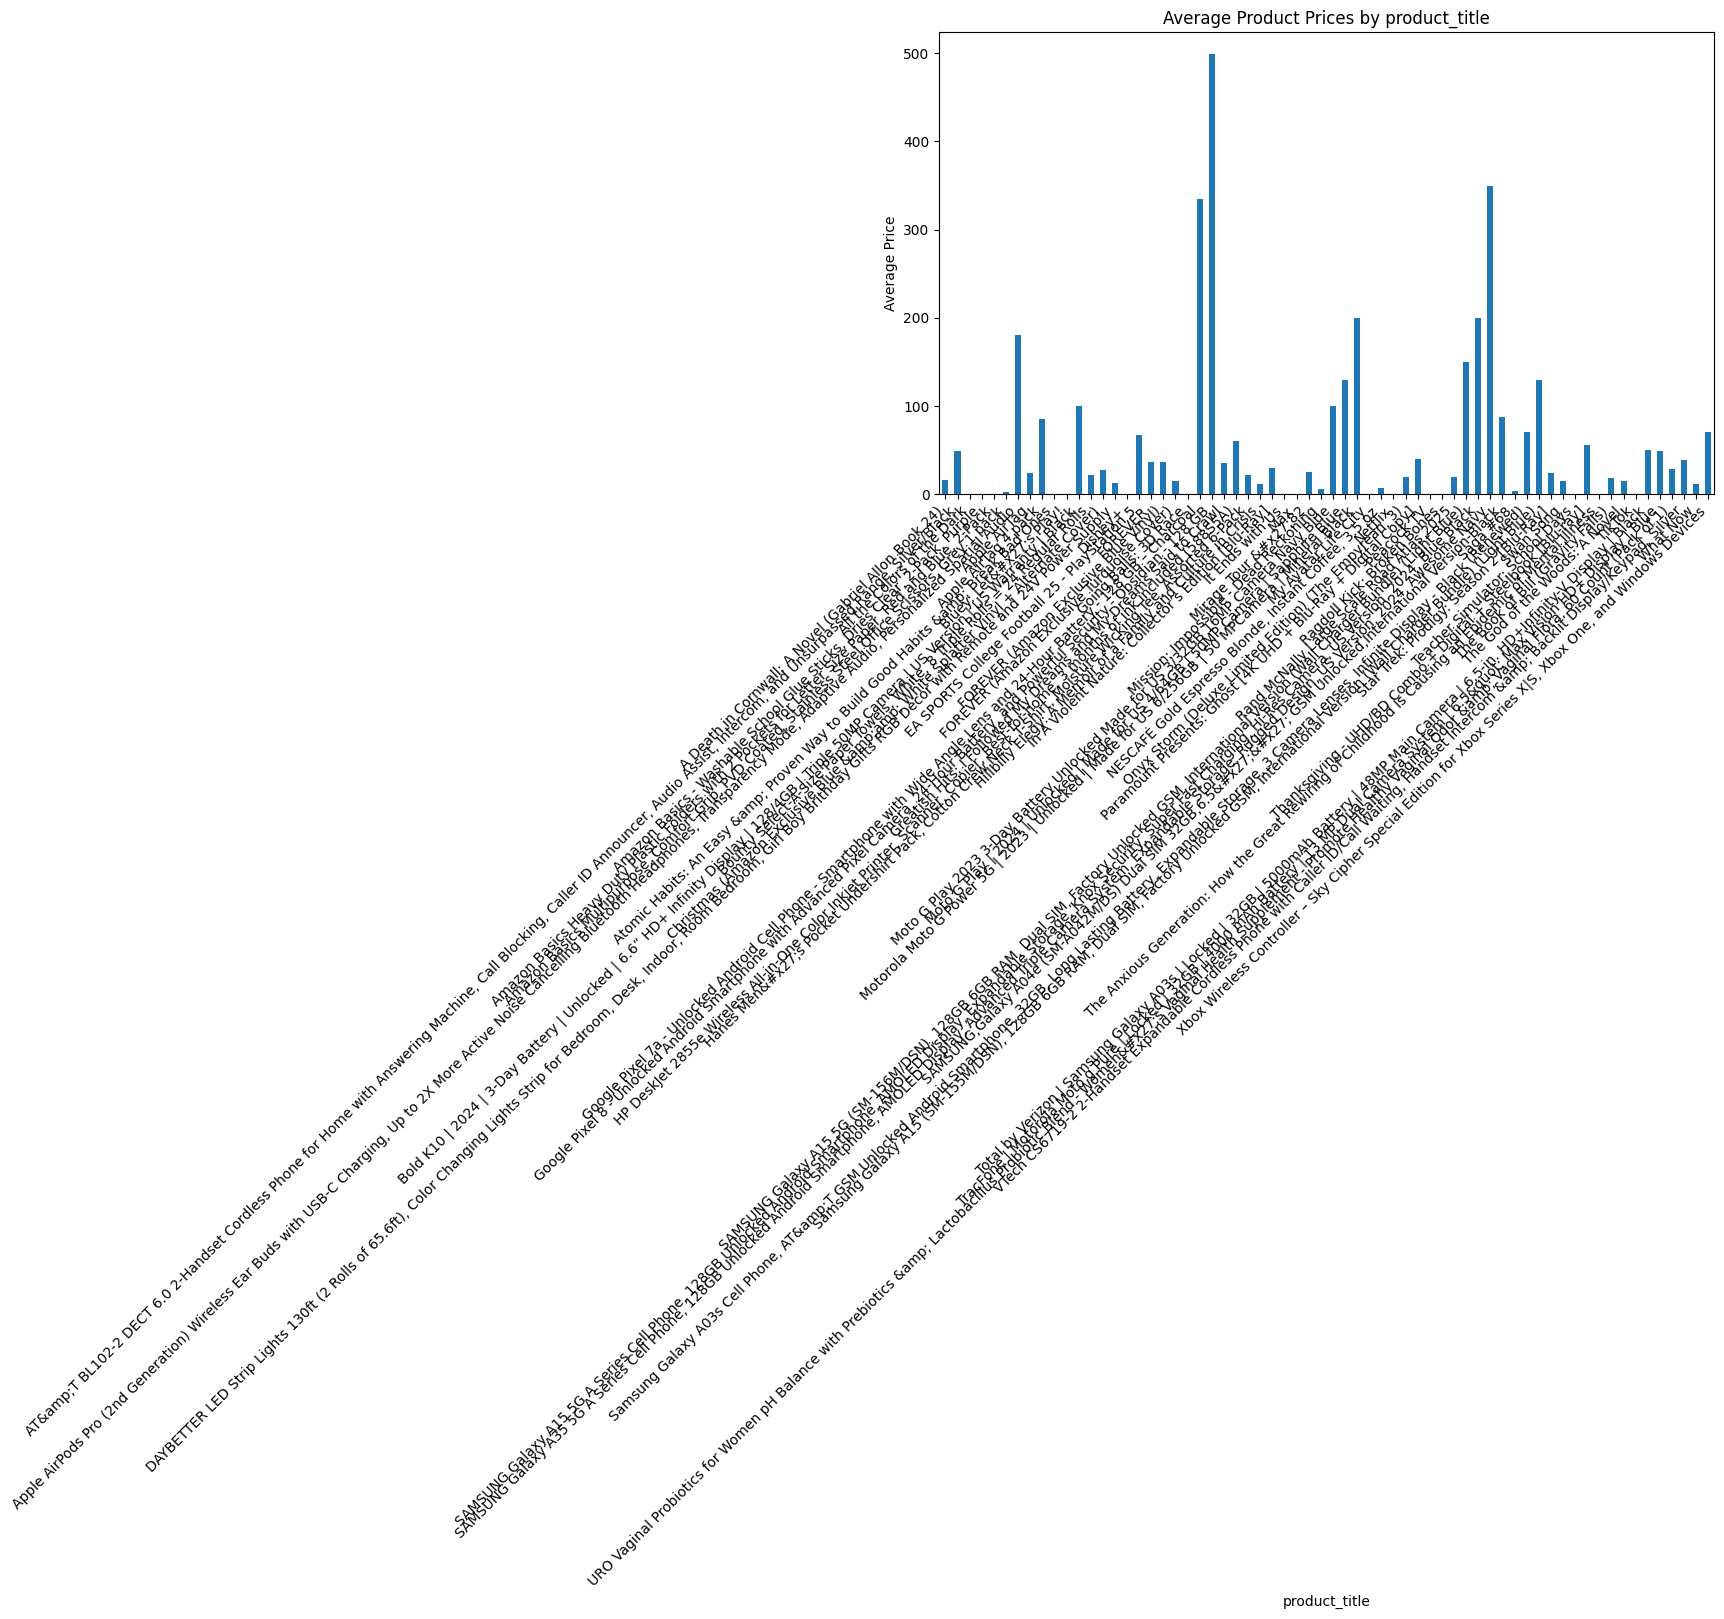

In [ ]:
# Analyze pricing trends across different categories or brands

product_title_prices = data.groupby('product_title')['product_price'].mean()
print(product_title_prices)

# Bar chart for average prices by product_title
plt.figure(figsize=(10, 6))
product_title_prices.plot(kind='bar')
plt.xlabel('product_title')
plt.ylabel('Average Price')
plt.title('Average Product Prices by product_title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

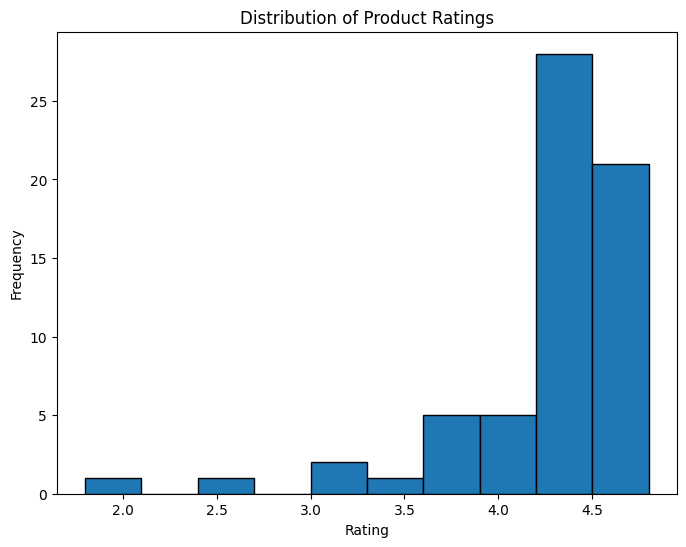

count    64.000000
mean      4.244444
std       0.511973
min       1.800000
25%       4.200000
50%       4.272222
75%       4.600000
max       4.800000
Name: product_star_rating, dtype: float64


In [ ]:
# Histogram of product ratings
plt.figure(figsize=(8, 6))
plt.hist(data['product_star_rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

print(data['product_star_rating'].describe())

Correlation between star rating and number of ratings: 0.12444167546934108


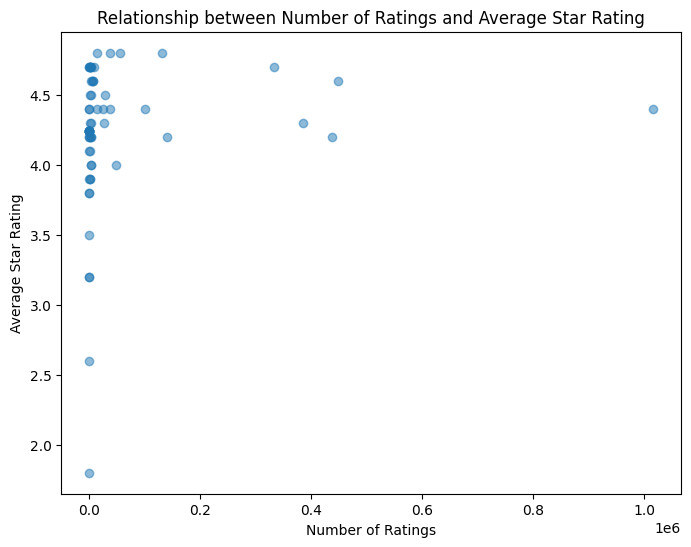

In [ ]:
# Correlation of  the average star rating with the number of ratings to identify trends

correlation = data['product_star_rating'].corr(data['product_num_ratings'])
print(f"Correlation between star rating and number of ratings: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(data['product_num_ratings'], data['product_star_rating'], alpha=0.5)
plt.xlabel('Number of Ratings')
plt.ylabel('Average Star Rating')
plt.title('Relationship between Number of Ratings and Average Star Rating')
plt.show()

In [ ]:
# Identify top-selling products

top_selling = data.sort_values('sales_volume', ascending=False)
print(top_selling[['product_title', 'sales_volume']].head(10))

                                        product_title  sales_volume
29  URO Vaginal Probiotics for Women pH Balance wi...        100000
63  HP DeskJet 2855e Wireless All-in-One Color Ink...         80000
37  Bounty Select-A-Size Paper Towels, White, 8 Tr...         60000
25  NESCAFÉ Gold Espresso Blonde, Instant Coffee, ...         40000
19  Amazon Basics Heavy Duty Plastic Folders with ...         40000
18  Amazon Basics - Washable School Glue Sticks, D...         30000
62  Xbox Wireless Controller – Sky Cipher Special ...         10000
61                            Bluey: Let&#x27;s Play!         10000
33  The Anxious Generation: How the Great Rewiring...         10000
34                                           Saga #68         10000


Correlation between sales volume and price: -0.16716128421439655
Correlation between sales volume and rating: 0.17813835132802375


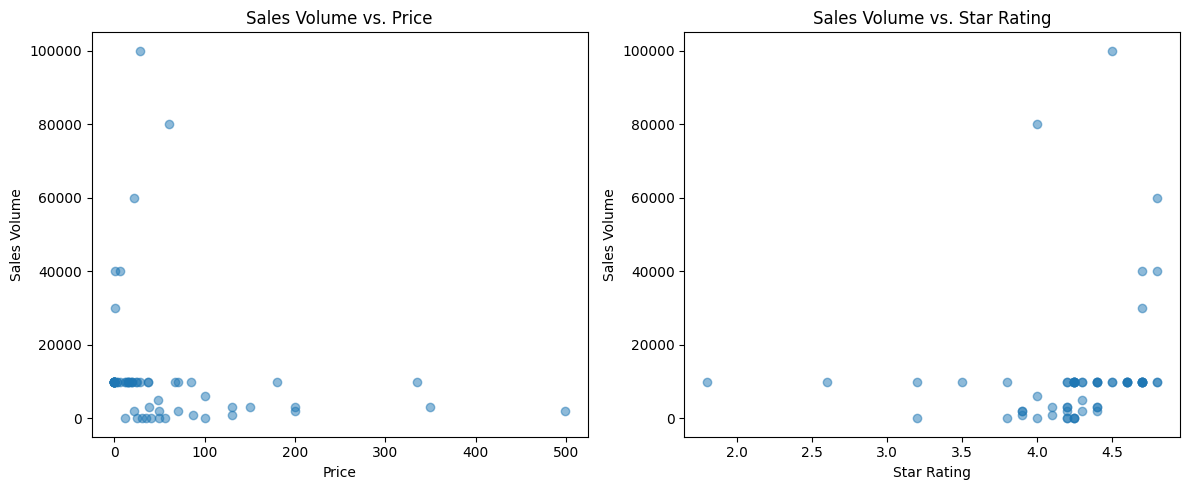

In [ ]:
# Analyze sales volume in relation to pricing, rating, and other attributes

# Correlation between sales volume and price
correlation_price = data['sales_volume'].corr(data['product_price'])
print(f"Correlation between sales volume and price: {correlation_price}")

# Correlation between sales volume and rating
correlation_rating = data['sales_volume'].corr(data['product_star_rating'])
print(f"Correlation between sales volume and rating: {correlation_rating}")

# Scatter plots for visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['product_price'], data['sales_volume'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.title('Sales Volume vs. Price')

plt.subplot(1, 2, 2)
plt.scatter(data['product_star_rating'], data['sales_volume'], alpha=0.5)
plt.xlabel('Star Rating')
plt.ylabel('Sales Volume')
plt.title('Sales Volume vs. Star Rating')

plt.tight_layout()
plt.show()

In [ ]:
# Find product that is best seller, Amazon's Choice, Prime eligibility, and also Climate Pledge Friendly

# 4
best_amazon_prime_climate = data[
    (data['is_best_seller'] == True) &
    (data['is_amazon_choice'] == True) &
    (data['is_prime'] == True) &
    (data['climate_pledge_friendly'] == True)
]
print("Products that are Best Seller, Amazon's Choice, Prime Eligible, and Climate Pledge Friendly:")
print(best_amazon_prime_climate[['product_title', 'product_price']])

# 3
best_amazon_prime = data[
    (data['is_best_seller'] == True) &
    (data['is_amazon_choice'] == True) &
    (data['is_prime'] == True)
]
print("Products that are Best Seller, Amazon's Choice, and Prime Eligible:")
print(best_amazon_prime[['product_title', 'product_price']])

best_amazon_climate = data[
    (data['is_best_seller'] == True) &
    (data['is_amazon_choice'] == True) &
    (data['climate_pledge_friendly'] == True)
]
print("Products that are Best Seller, Amazon's Choice, and Climate Pledge Friendly:")
print(best_amazon_climate[['product_title', 'product_price']])

best_prime_climate = data[
    (data['is_best_seller'] == True) &
    (data['is_prime'] == True) &
    (data['climate_pledge_friendly'] == True)
]
print("Products that are Best Seller, Prime Eligible, and Climate Pledge Friendly:")
print(best_prime_climate[['product_title', 'product_price']])

amazon_prime_climate = data[
    (data['is_amazon_choice'] == True) &
    (data['is_prime'] == True) &
    (data['climate_pledge_friendly'] == True)
]
print("Products that are Amazon's Choice, Prime Eligible, and Climate Pledge Friendly:")
print(amazon_prime_climate[['product_title', 'product_price']])

# 2
prime_climate = data[
    (data['is_prime'] == True) &
    (data['climate_pledge_friendly'] == True)
]
print("Products that are Prime Eligible and Climate Pledge Friendly:")
print(prime_climate[['product_title', 'product_price']])

Products that are Best Seller, Amazon's Choice, Prime Eligible, and Climate Pledge Friendly:
Empty DataFrame
Columns: [product_title, product_price]
Index: []
Products that are Best Seller, Amazon's Choice, and Prime Eligible:
Empty DataFrame
Columns: [product_title, product_price]
Index: []
Products that are Best Seller, Amazon's Choice, and Climate Pledge Friendly:
Empty DataFrame
Columns: [product_title, product_price]
Index: []
Products that are Best Seller, Prime Eligible, and Climate Pledge Friendly:
Empty DataFrame
Columns: [product_title, product_price]
Index: []
Products that are Amazon's Choice, Prime Eligible, and Climate Pledge Friendly:
Empty DataFrame
Columns: [product_title, product_price]
Index: []
Prime Eligible and Climate Pledge Friendly:
                                       product_title  product_price
4  SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...         199.99
6  SAMSUNG Galaxy A35 5G A Series Cell Phone, 128...         349.99


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

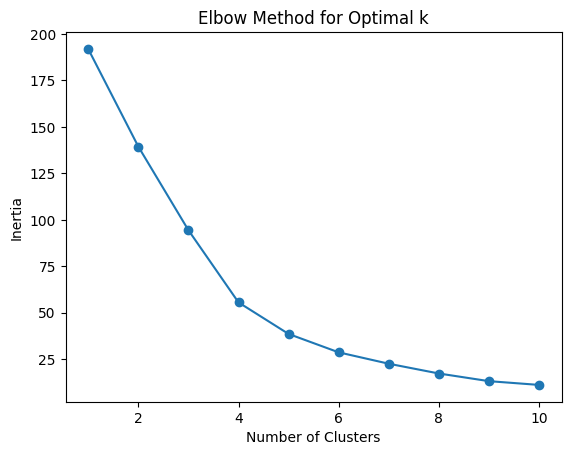

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
       product_price  product_star_rating   sales_volume
count       5.000000             5.000000       5.000000
mean       23.626000             4.560000   64000.000000
std        23.310618             0.336155   26076.809621
min         0.490000             4.000000   40000.000000
25%         6.680000             4.500000   40000.000000
50%        22.180000             4.700000   60000.000000
75%        28.790000             4.800000   80000.000000
max        59.990000             4.800000  100000.000000


Cluster 1:
       product_price  product_star_rating  sales_volume
count      53.000000            53.000000     53.000000
mean       32.092075             4.206499   7515.849057
std        37.930450             0.542564   5203.840366
min         0.000000             1.800000      5.000000
25%         0.000000             4.200000   3000.000000
50%        19.020000             4.244444  10000.000000
75%        48.750000             4.600000  10000.000000
max       149.7

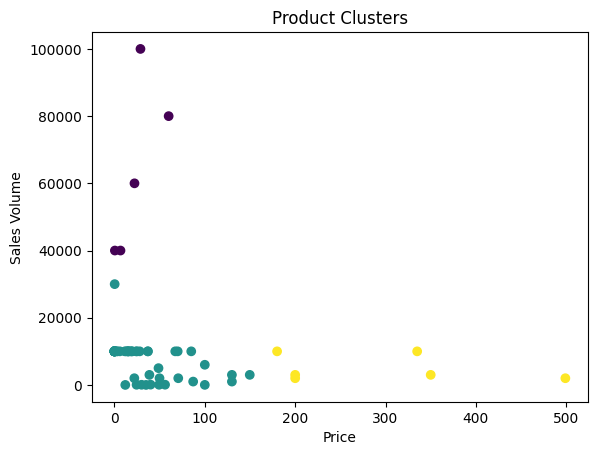

In [ ]:
# Perform clustering to identify patterns or segments among products using KNN

# Select relevant features for clustering
features = data[['product_price', 'product_star_rating', 'sales_volume']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (using the Elbow method)
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

for i in range(optimal_k):
  cluster_data = data[data['cluster'] == i]
  print(f"Cluster {i}:")
  print(cluster_data[['product_title', 'product_price', 'product_star_rating', 'sales_volume']].describe())
  print("\n")

plt.scatter(data['product_price'], data['sales_volume'], c=data['cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.title('Product Clusters')
plt.show()
